## Model training with pyspark and non-pyspark workflow

Encompasses these steps with pyspark and non-pyspark libraries (sklearn, visualization libraries)
* Preprocessing
    * OHE, MinMax Scaling, 70/30 Train Test Split
* Model training
    * Linear Regression, Random Forest and Gradient Boosted Trees Regressor
* Findings, reasons and insights

# Findings, Results, Insights and Reasons
Encompasses
* Preprocessing
* pyspark and non-pyspark (sklearn) model results
* Prediction
* Conclusion

## Preprocessing

OHE, MinMax Scaling, 70/30 Train Test Split

* Performed initial cleaning to impute for missing values
* Due to the conciseness and sufficiency of data, further feature engineering/transformations such as creating new columns or deriving additional features was not done to remain streamlined and focused on the essential attributes for model training and evaluation
    * Did not require additional binning/reduction of dimensionality due to the small number of original features (companyId, jobRole, education, major, industry, yearsExperience, and distanceFromCBD)
    * Binning or transformations would have been unnecessary and might have introduced unnecessary complexity - existing features were sufficient to capture the variability in the data
* Preprocessed using OHE, and MinMax Scaling for encoding for categorical columns, and scaling float columns to enable model to effectively interpret features
    * pyspark required additional StringIndexer and VectorAssembly for conversion of categorical values into indices, and combining columns into a single feature vector respectively
    * non-pyspark is more straightforward, allowing direct encoding, and scaling to categorical and float columns
* 70/30 Train Test Split

##### with pyspark

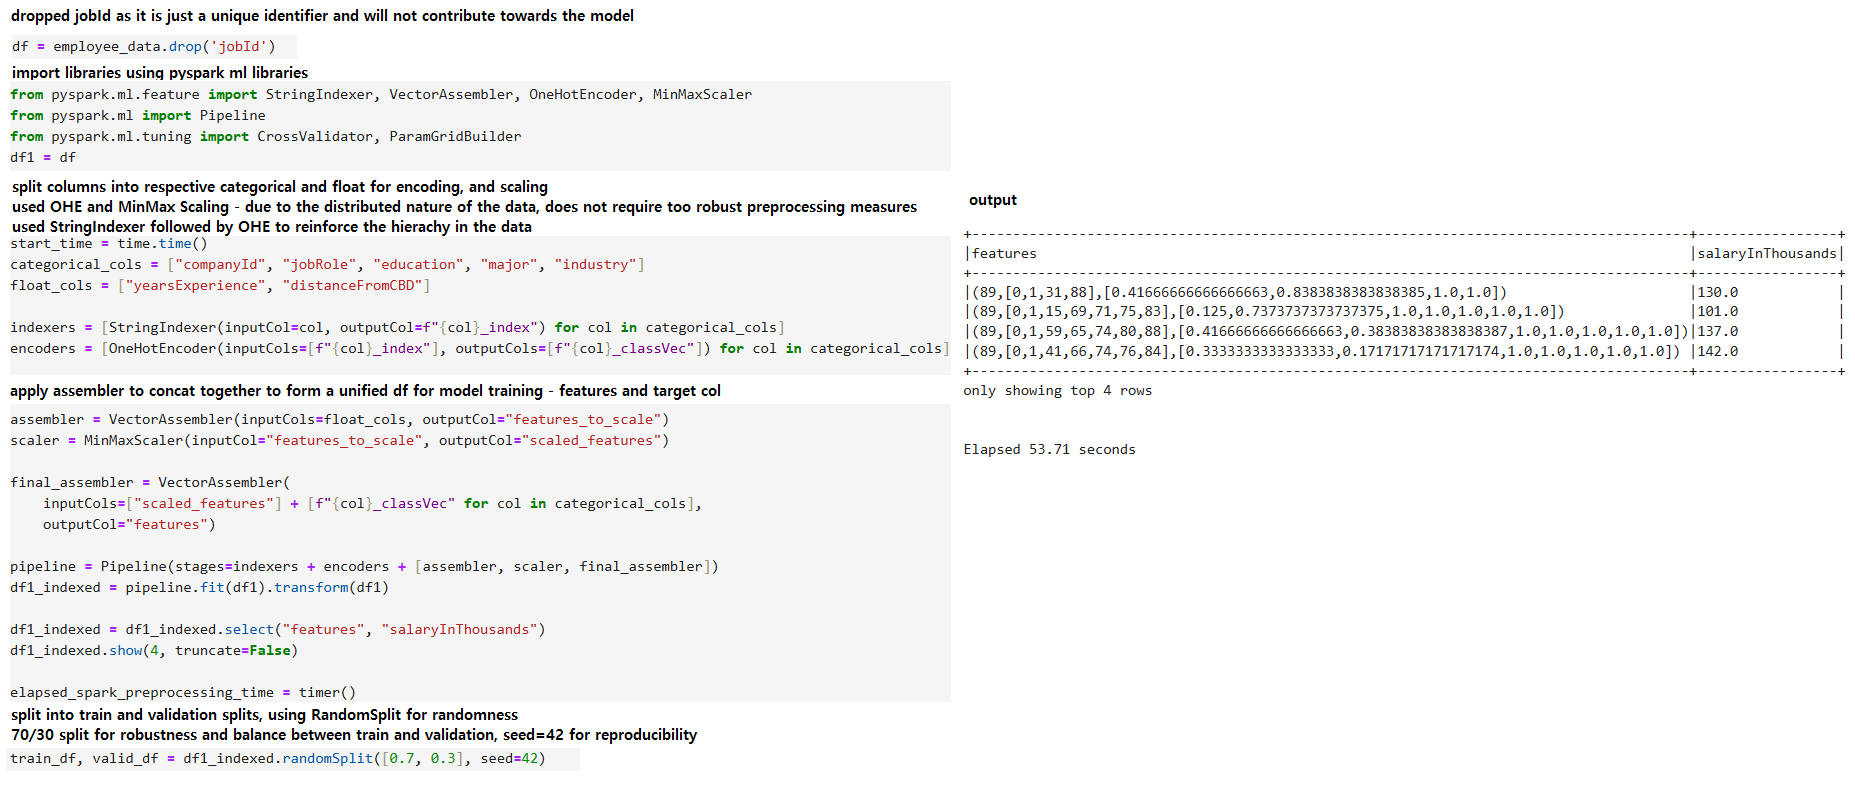

* StringIndexer and VectorAssmbler is used to prepare data for model training
    * StringIndexer converts categorical string columns into numeric values
    * VectorAssembler combines multiple columns into a single vector column
* Transformation steps are different due to the distributed nature of the data processing
* More complex setup and distributed data handling

##### with non-pyspark

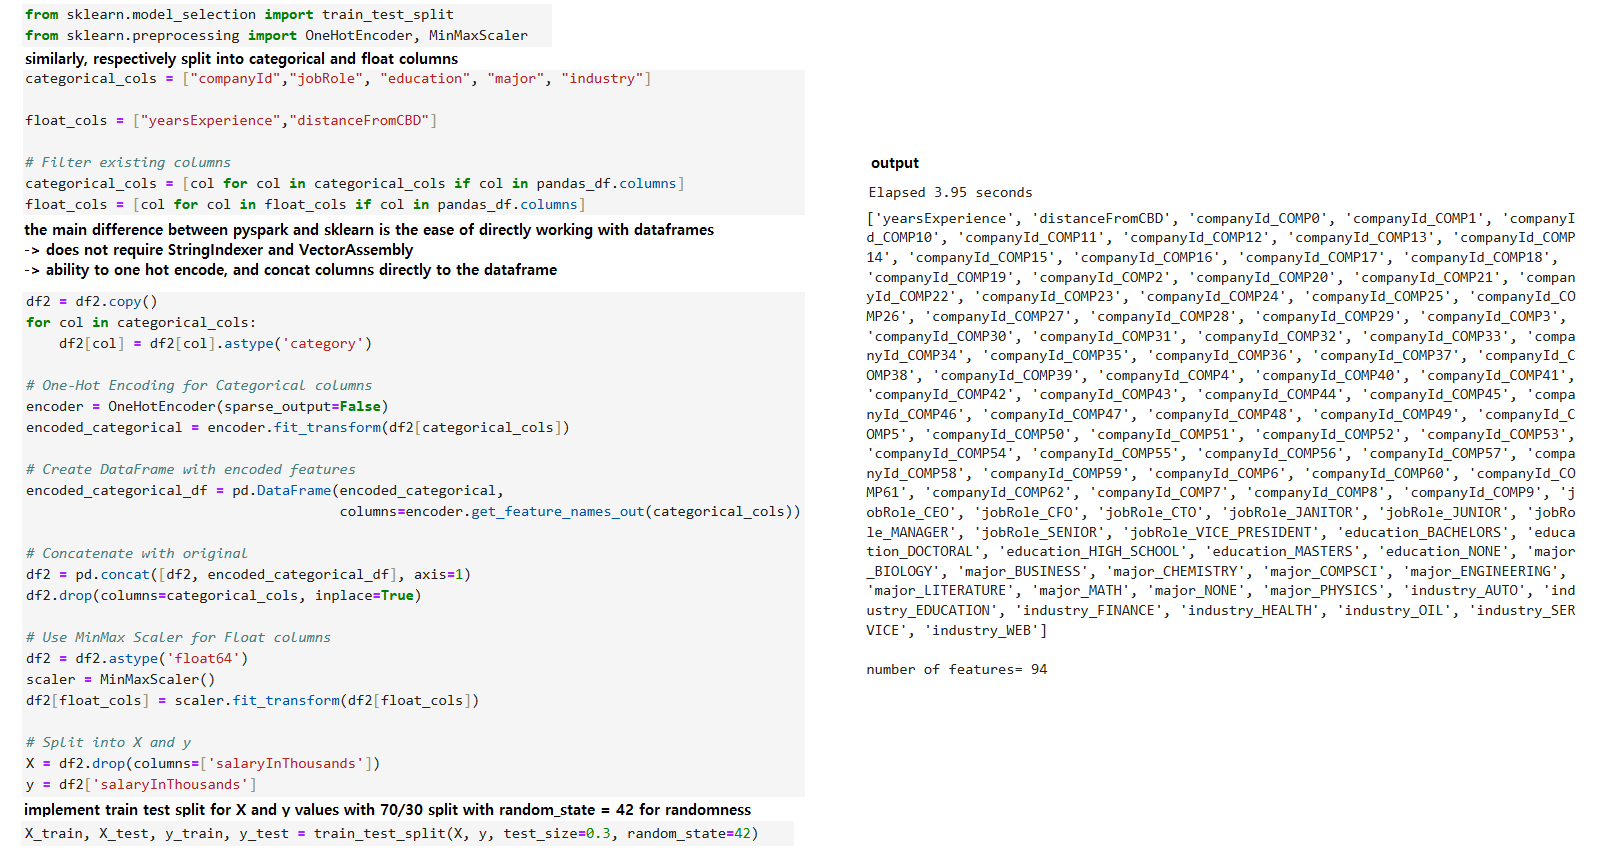

* Straightforward and ease of preprocessing
* Optimized for use on single machines with data that fits into memory

## Results from models

The common metrics for regression model performance is RMSE, MAE, and R2
* RMSE measures the square root of the average squared differences between predicted and actual values
    * where lower RMSE values indicate better model performance
    * sensitive to outliers because it squares the errors
* MAE measures the average absolute differences between predicted and actual values
    * where lower MAE values indicate better model performance
    * less sensitive to outliers compared to RMSE
* R2
    * it is proportion of the variance in the dependent variable that is predictable from the independent variables
    * shows how well the data fit the regression model - the goodness of fit

Objective of models is to predict salary
* ##### Linear Regression would be the best for this task due to its simplicity, and predictive performance as the relationships between features are approximately linear
* Other main models utilized were RF regressor, and GBT regressor; for feature importances and comparison
    * These models are good for handling complex data 
    * RF is particularly effective at capturing non-linear relationships and interactions between features due to its ensemble nature
    * GBT is powerful for its ability to build models sequentially, where each new tree corrects the errors of the previous one, especially useful in cases with non-linear relationships and when the goal is to achieve high predictive accuracy
    * Both models are more computationally resourceful in comparison to Linear Regression

### pyspark models

Linear Regression performed the best with R2 of 0.74, RMSE of 19.62, and intercept of 129.9; elapsing 84.12s for the base model
* Results indicate strong predictive performance where ow RMSE demonstrates the model's accuracy in predicting the outcomes, coupled with the quick training time highlights its efficiency

RF did not perform well, and GBT performed slightly better in comparison to LR
* RF's subpar performance could be attributed to
    * Setting suboptimal hyperparameters, leading to less effective tree splits and reduced predictive accuracy
    * Sometimes overfit on the training data, particularly if the number of trees or depth of the trees is not properly managed
* GBT performed slightly better than LR, however due to the long training time - elapsed 236.39s, it is not as efficient as LR
* However, RF and GBT provided insights into the feature importances; highlighting yearsExperience and distanceFromCBD as the top feature importances

#### Linear Regression

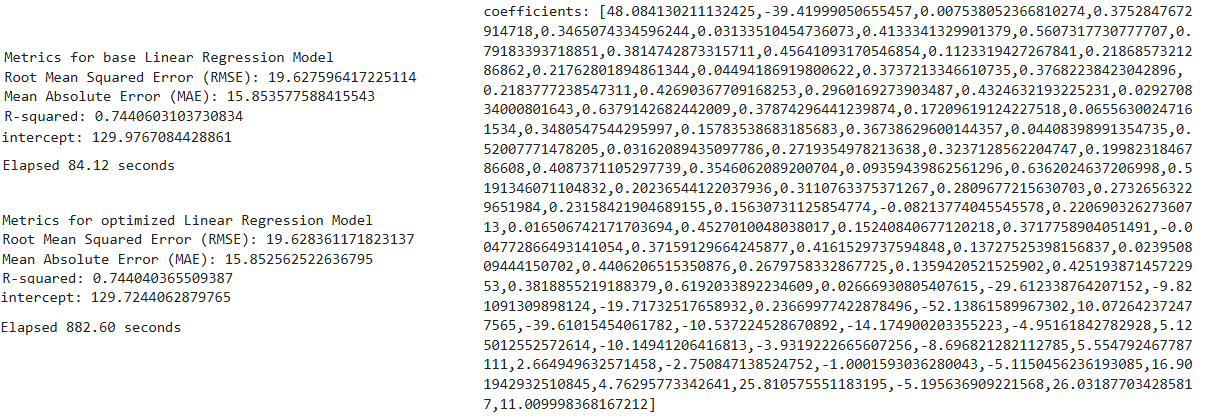

Linear regression is highly suitable for this task as 
* It is simple to interpret and ease of integration
* Good for this task due to the approximately linear relationships in the data
* When the relationship between features and target variable is linear, LR often has a strong predictive performance
* Generally trains quickly, especially on smaller to medium-sized datasets which can be highly advantageous in time-sensitive applications

#### Random Forest Regressor

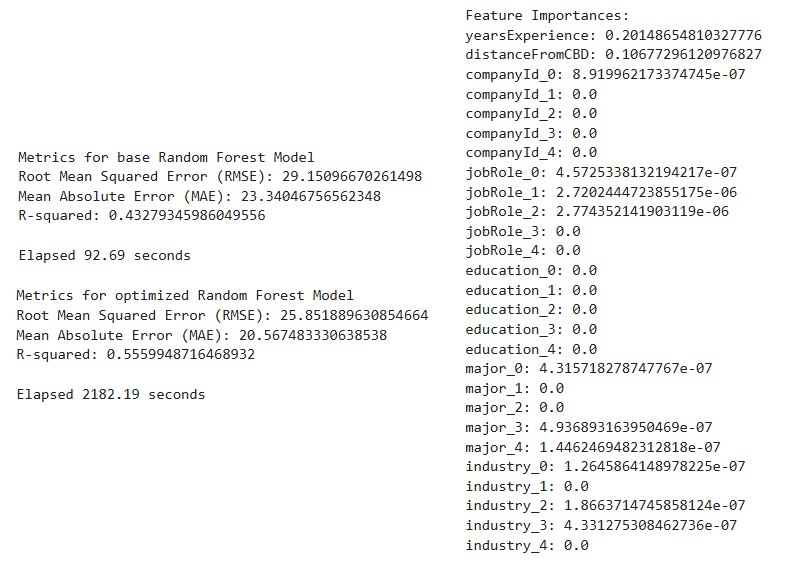

#### Gradient Boosted Trees Regressor

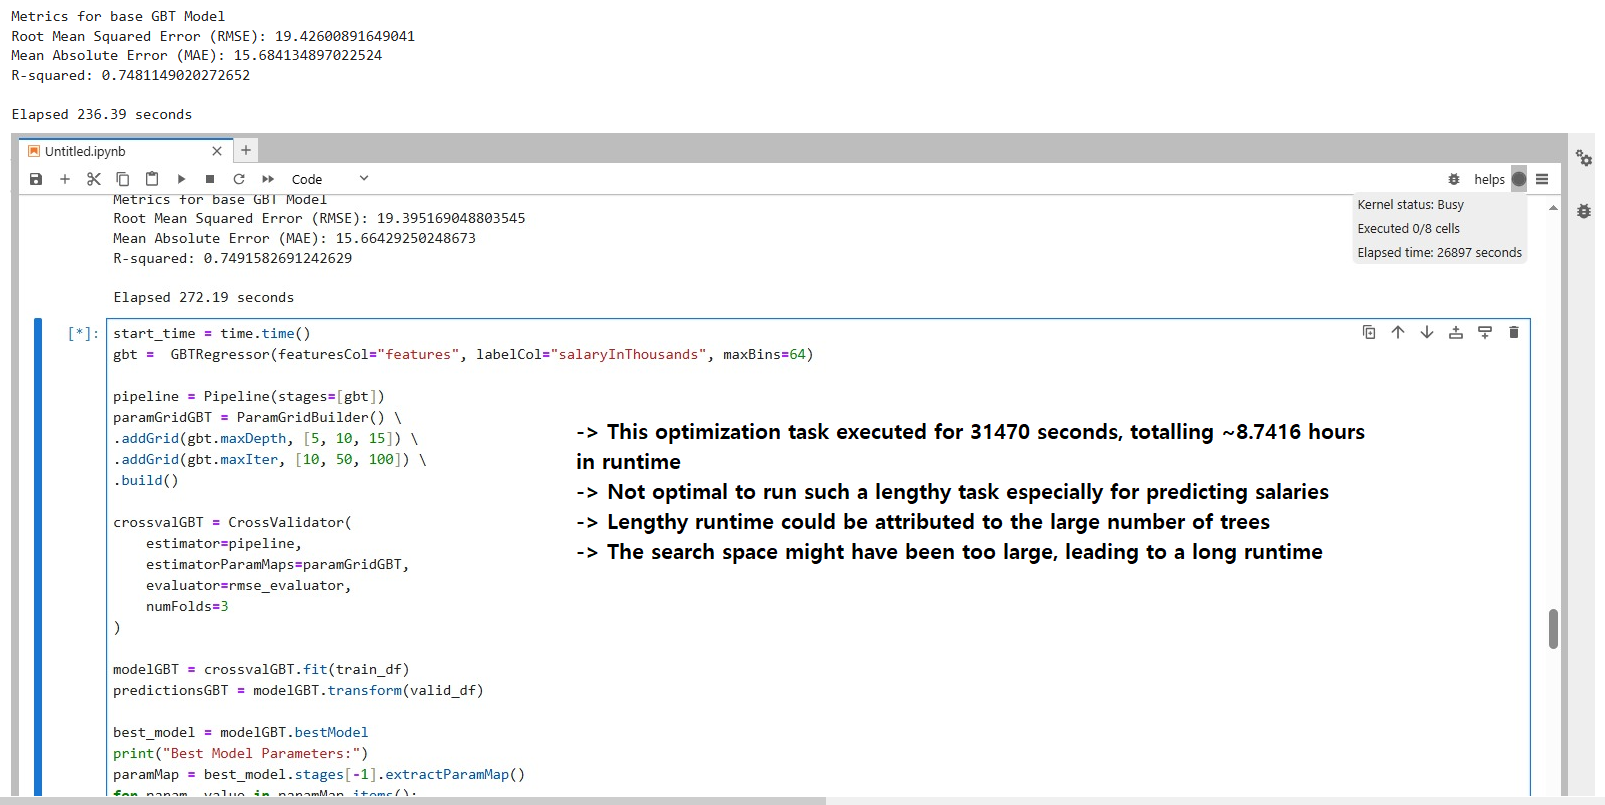

### non-pyspark models

##### LR performed the best in general, with R2 of 0.74, RMSE of 19.59, and intercept of 116.2; elapsing 7.11s for the base model
* In comparison to pyspark, performs slightly better with better performance and run time
Primarily tested other models RF, GBT and Light GBM for feature importances and comparison 
* Tested Light GBM model to compare with GBT - performed the best in terms of metrics of RMSE, MAE and R2 compared to all the models
* Highest feature importances and consistent features between models were - jobRole JANITOR, yearsExperience and distanceFromCBD, indicating these factors had the most significant impact on the predictions

#### Linear Regression

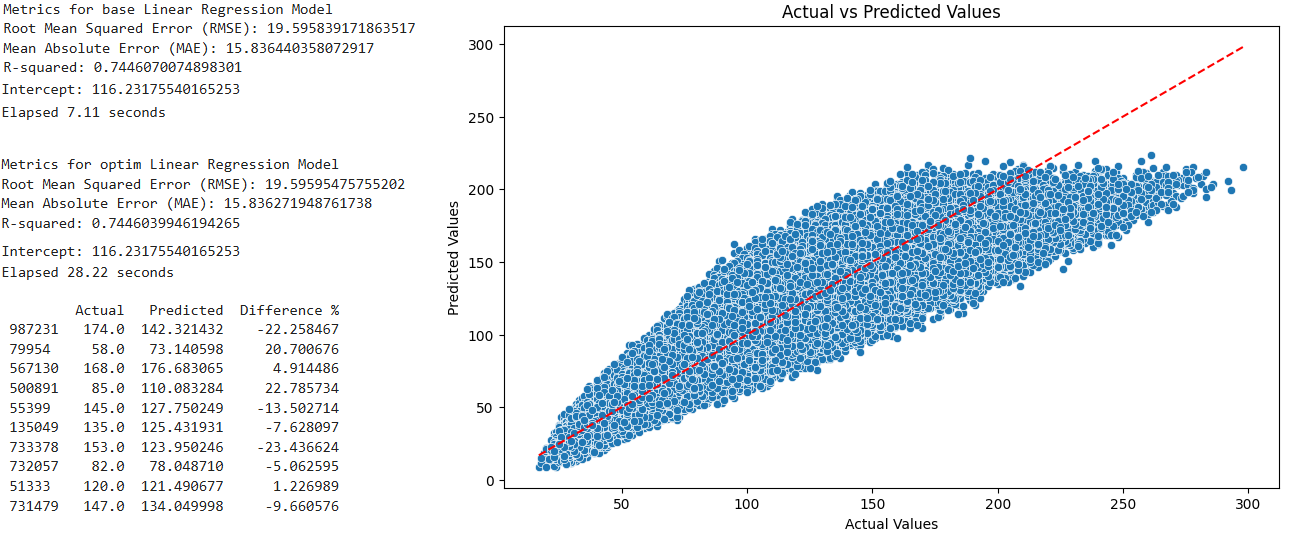

* Performed slightly better in comparison to pyspark, with decrease in RMSE, MAE, and intercept value, and increased R2
    * pyspark - (RMSE) 19.62, (MAE) 15.85, (R2) 0.744, intercept 129.9
    * sklearn - (RMSE) 19.59, (MAE) 15.83, (R2) 0.744, intercept 116
    * Lower intercept indicating a better fit of the model to the data, where the sklearn model is more accurately representing the baseline value of the target variable
* Faster run-time; base and optimization elapsed
    * pyspark - 84.12s and 882.6s respectively
    * sklearn - 7.11s and 28.22s
* Between optimization, and base metrics; there were no changes which could be attributed to
    * GridSearch did not explore a wide enough range of hyperparams
    * The initial parameters were already close to optimal

#### Random Forest Regressor

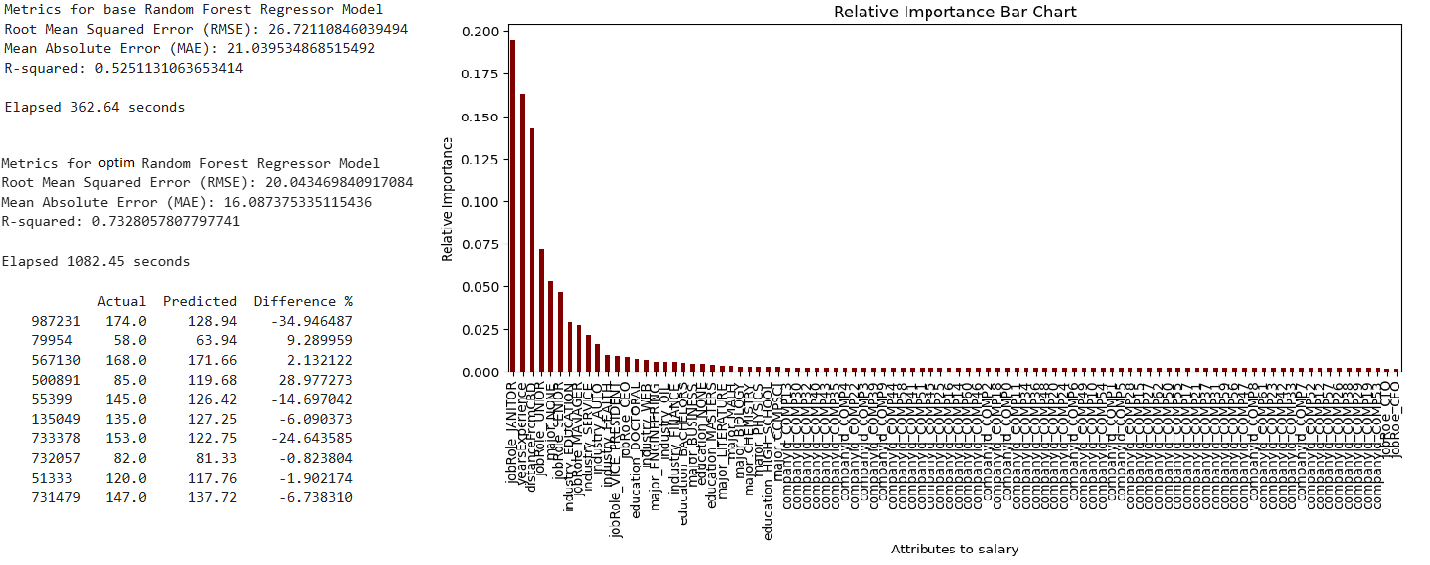

* sklearn base RF model ran longer than pyspark
    * Could be due to the increased computational complexity and resource requirements on a single-node environment, as RF is an ensemble method
    * pyspark - (base) elapsed 92.69s and (optimization) elapsed 2182.19s
    * sklearn - (base) elapsed 362.64s and (optimization) elapsed 1082.45s
* sklearn uses a set of default hyperparameters, which might have been optimal for the task and hence, the better performance in comparison to pyspark
* pyspark.ml also uses a set of default hyperparameters, however were likely not optimal for the task

#### Light GBM Regressor

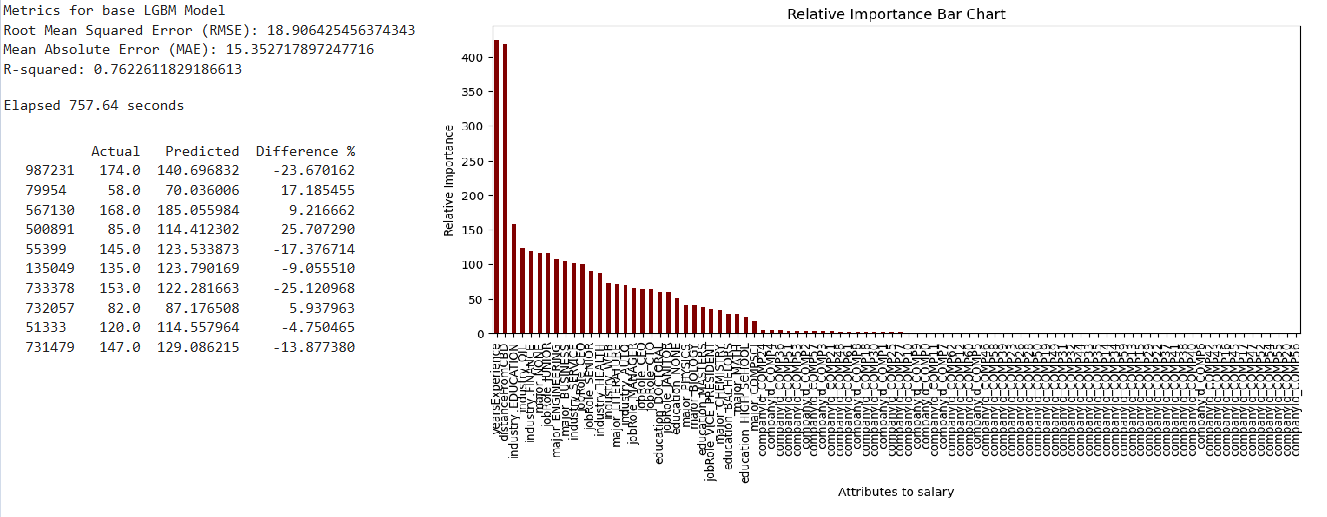

Used as a comparison between RF, and GBT 
* In comparison to RF and GBT, has the lowest RMSE, MAE and highest R2
* However, similar to RF has long runtime of 757.64s

#### GBT Regressor

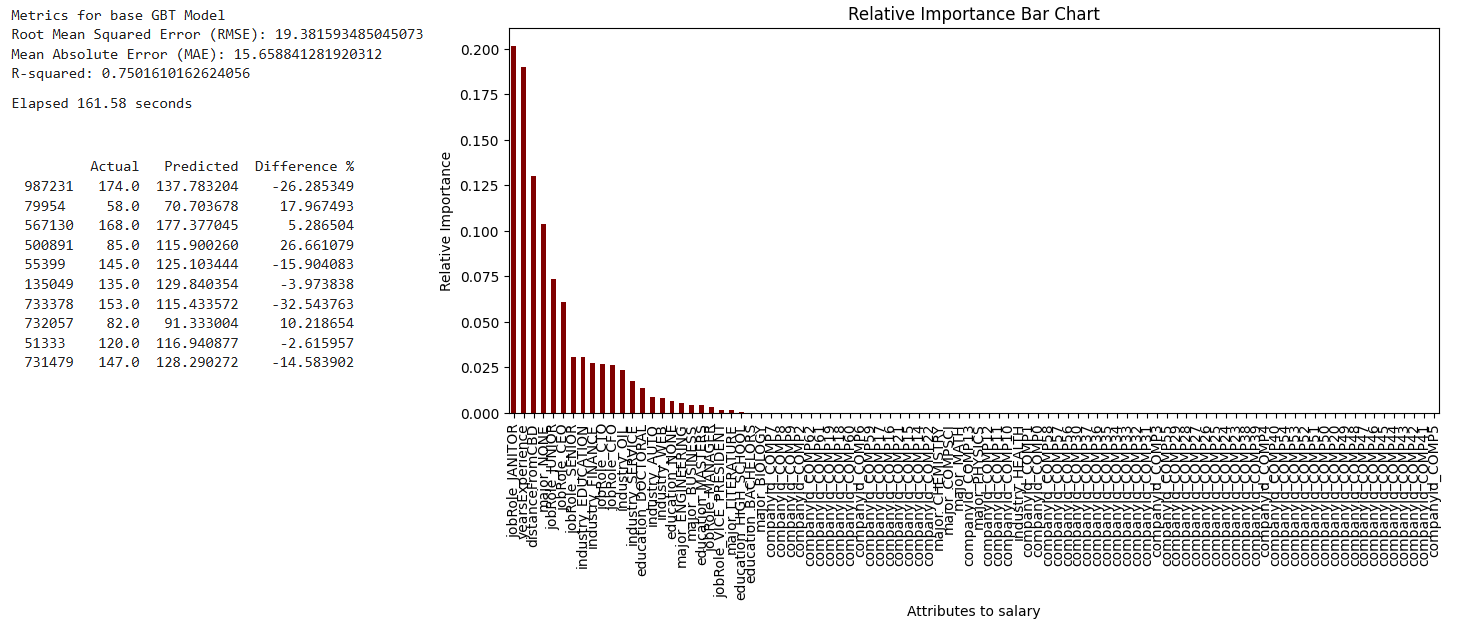

* More efficient in runtime in comparison to pyspark
    * pyspark - (base) elapsed 272.19s 
    * sklearn - (base) elapsed 161.58s
* Slightly better performance in comparison to pyspark GBT model - similar to LR
    * pyspark - (RMSE) 19.42, (MAE) 15.68, (R2) 0.748
    * sklearn - (RMSE) 19.38, (MAE) 15.65, (R2) 0.750

#### Prediction

Create a dataframe containing 5 random people with random jobRoles, etc to test the generalization of models on unseen random data
* medianSalary is derived by filtering to respective jobRole, industry, yearsExperience, and distanceFromCBD to get a rough gauge on prediction performance

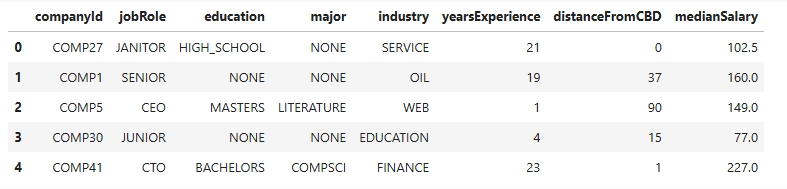

* Generally can be seen that the models perform better predicting middle range salaries in comparison to low and high salaries

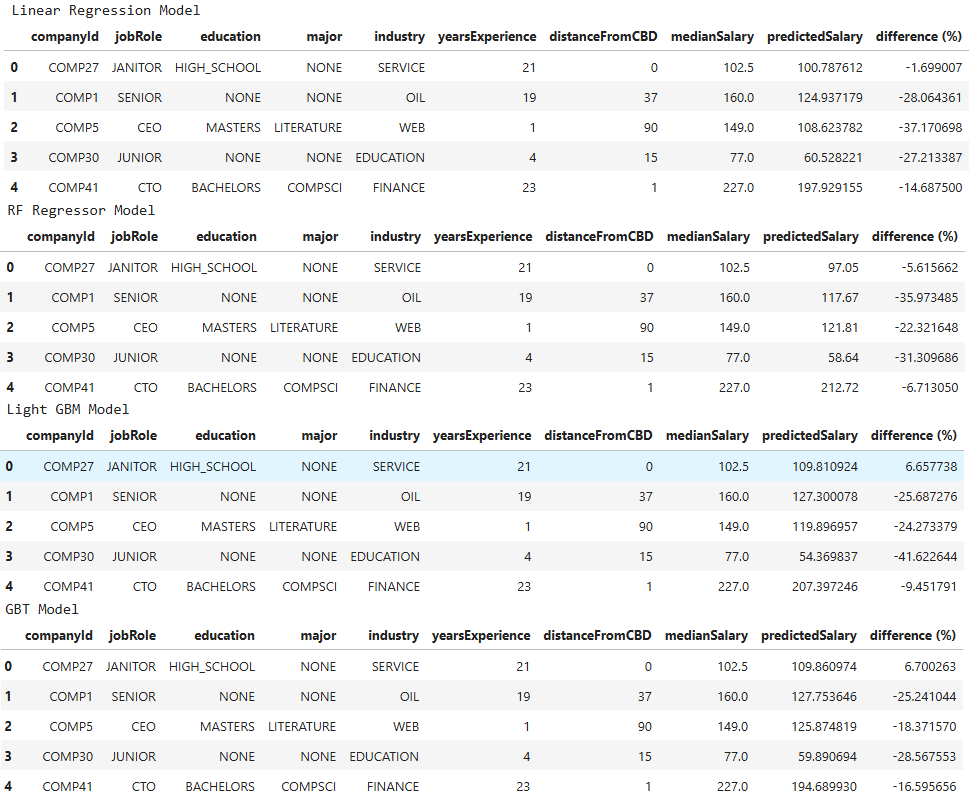

### Future enhancements
* Could implement early stopping to monitor optimization tasks, preventing overfitting and reduce computational costs
* Extend hyperparameter tuning process to encompass more variables and a larger space

# Conclusion

##### Linear regression performs the best for the task of predicting salaries with high efficiency and good predictive performance, and GBT would be the best for understanding feature importances and good predictive performance
* Highest and consistent feature importances - jobRole JANITOR, yearsExperience, distanceFromCBD
* Company does not carry as much feature importance in comparison to more prominent features; slight feature importance
* Models perform better on predicting middle to high ranging salaries

# MAIN model training

## with PySpark

In [1]:
import findspark
findspark.init()

In [2]:
from pyspark.sql import SparkSession
import time

In [3]:
import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.config("spark.master", 'local') \
.config("spark.driver.memory", "8g") \
.config("spark.executor.memory", "8g") \
.getOrCreate()

Load datasets, use inferSchema option to get Spark to guess and automatically choose the most suitable schema of the input data. Otherwise the default of the schemas is string for given datasets

In [4]:
train_df = spark.read.option('header', 'true').option('inferSchema', 'true').csv('train_dataset.csv')
train_df.printSchema()

root
 |-- jobId: string (nullable = true)
 |-- companyId: string (nullable = true)
 |-- jobRole: string (nullable = true)
 |-- education: string (nullable = true)
 |-- major: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- yearsExperience: integer (nullable = true)
 |-- distanceFromCBD: integer (nullable = true)



In [5]:
train_salaries_df = spark.read.option('header', 'true').option('inferSchema', 'true').csv('train_salaries.csv')
train_salaries_df.printSchema()

root
 |-- jobId: string (nullable = true)
 |-- salaryInThousands: integer (nullable = true)



### Initial cleaning

* Imputing missing values in data

In [6]:
employee_data = train_df.join(train_salaries_df, on='jobId', how='left')
from pyspark.sql.functions import countDistinct, sum, col as spark_col
from pyspark.sql.functions import when, lit
median_salary = employee_data.approxQuantile("salaryInThousands", [0.5], 0.01)[0]
employee_data = employee_data.withColumn("salaryInThousands",
                                         when(spark_col("salaryInThousands") == 0,
                                              lit(median_salary))  # Use lit to assign new values
                                         .otherwise(spark_col("salaryInThousands")))
employee_data.filter(employee_data.salaryInThousands == 0).show()

+-----+---------+-------+---------+-----+--------+---------------+---------------+-----------------+
|jobId|companyId|jobRole|education|major|industry|yearsExperience|distanceFromCBD|salaryInThousands|
+-----+---------+-------+---------+-----+--------+---------------+---------------+-----------------+
+-----+---------+-------+---------+-----+--------+---------------+---------------+-----------------+



### Preprocessing

* Encompasses

Dropped jobId as it is a unique identifier for each person, and does not contribute towards the model, hence dropped

In [7]:
df = employee_data.drop('jobId')

In [8]:
def timer():
    end_time = time.time()
    elapsed_time = end_time - start_time
    print()
    print(f"Elapsed {elapsed_time:.2f} seconds")
    return elapsed_time

Steps to preprocessing
1. Identify and split columns into respective categorical and float
2. Firstly, started with categorical columns by putting through StringIndexer to convert categorical values into numerical indices
3. Followed by One Hot Encoding to preserve the hierachical nature of the data by encoding to indexed data to convert the indices into binary vectors
4. Combine all numerical features into a single vector column to prepare for scaling
5. Scale the numerical features with MinMax Scaling
6. Using a final assembler to combines all features into a single feature vector that can be used for modelling in the next step
7. Created a pipeline to perform the preprocessing tasks sequentially - more modularity
8. Fit the pipeline, then transform to apply all the preprocessing steps

In [9]:
from pyspark.ml.feature import StringIndexer, VectorAssembler, OneHotEncoder, MinMaxScaler
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
df1 = df
start_time = time.time()
categorical_cols = ["companyId", "jobRole", "education", "major", "industry"]
float_cols = ["yearsExperience", "distanceFromCBD"]

indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index") for col in categorical_cols]
encoders = [OneHotEncoder(inputCols=[f"{col}_index"], outputCols=[f"{col}_classVec"]) for col in categorical_cols]

assembler = VectorAssembler(inputCols=float_cols, outputCol="features_to_scale")
scaler = MinMaxScaler(inputCol="features_to_scale", outputCol="scaled_features")

final_assembler = VectorAssembler(
    inputCols=["scaled_features"] + [f"{col}_classVec" for col in categorical_cols],
    outputCol="features")

pipeline = Pipeline(stages=indexers + encoders + [assembler, scaler, final_assembler])
df1_indexed = pipeline.fit(df1).transform(df1)

df1_indexed = df1_indexed.select("features", "salaryInThousands")
df1_indexed.show(4, truncate=False)

elapsed_spark_preprocessing_time = timer()

+---------------------------------------------------------------------------------------+-----------------+
|features                                                                               |salaryInThousands|
+---------------------------------------------------------------------------------------+-----------------+
|(89,[0,1,31,88],[0.41666666666666663,0.8383838383838385,1.0,1.0])                      |130.0            |
|(89,[0,1,15,69,71,75,83],[0.125,0.7373737373737375,1.0,1.0,1.0,1.0,1.0])               |101.0            |
|(89,[0,1,59,65,74,80,88],[0.41666666666666663,0.38383838383838387,1.0,1.0,1.0,1.0,1.0])|137.0            |
|(89,[0,1,41,66,74,76,84],[0.3333333333333333,0.17171717171717174,1.0,1.0,1.0,1.0,1.0]) |142.0            |
+---------------------------------------------------------------------------------------+-----------------+
only showing top 4 rows


Elapsed 53.71 seconds


Randomly split into 70/30 split for train and validation
* 70/30 for more robustness, and balance
* Seed for reproducibility

In [10]:
train_df, valid_df = df1_indexed.randomSplit([0.7, 0.3], seed=42)

### Model training
Regression model for predicting salary
* Linear Regression
* Random Forest Regressor
* GBT Regressor

The common metrics for regression model performance is RMSE, MAE, and R2
* RMSE measures the square root of the average squared differences between predicted and actual values
    * where lower RMSE values indicate better model performance
    * sensitive to outliers because it squares the errors
* MAE measures the average absolute differences between predicted and actual values
    * where lower MAE values indicate better model performance
    * less sensitive to outliers compared to RMSE
* R2
    * it is proportion of the variance in the dependent variable that is predictable from the independent variables
    * shows how well the data fit the regression model - the goodness of fit

In [11]:
from pyspark.ml.evaluation import RegressionEvaluator
# Prints out evaluation metrics - rmse, mae, r2
def evaluation_metrics(prediction,model):
  print(f"Metrics for {model}")
  rmse = rmse_evaluator.evaluate(prediction)
  print(f"Root Mean Squared Error (RMSE): {rmse}")

  mae = mae_evaluator.evaluate(prediction)
  print(f"Mean Absolute Error (MAE): {mae}")

  r2 = r2_evaluator.evaluate(prediction)
  print(f"R-squared: {r2}")

rmse_evaluator = RegressionEvaluator(labelCol='salaryInThousands', predictionCol='prediction', metricName='rmse')
mae_evaluator = RegressionEvaluator(labelCol="salaryInThousands", predictionCol="prediction", metricName="mae")
r2_evaluator = RegressionEvaluator(labelCol="salaryInThousands", predictionCol="prediction", metricName="r2")

#### Linear Regression

Reason for choosing linear regression
* Simple to implement and interpret
* Computationally efficient in comparison to more complex algorithms
* In problems where relationship between variables is approximately linear, linear regression can be quite effective in making accurate predictions

In [17]:
from pyspark.ml.regression import LinearRegression
start_time = time.time()
lreg = LinearRegression(featuresCol='features', labelCol='salaryInThousands')
model = lreg.fit(train_df)
predictionBaseLR = model.transform(valid_df)
evaluation_metrics(predictionBaseLR, "base Linear Regression Model")
elapsed_spark_base_LR = timer()

Metrics for base Linear Regression Model
Root Mean Squared Error (RMSE): 19.627596417225114
Mean Absolute Error (MAE): 15.853577588415543
R-squared: 0.7440603103730834

Elapsed 84.12 seconds


In [35]:
model = lreg.fit(train_df)
coefficients = model.coefficients
intercept = model.intercept
print("Base LR model")
print("intercept:", intercept)

Base LR model
intercept: 129.9767084428861


In [18]:
start_time = time.time()
lr = LinearRegression(featuresCol="features", labelCol="salaryInThousands")

pipeline = Pipeline(stages=[lr])
paramGridLR = ParamGridBuilder().addGrid(lr.regParam, [0.1, 0.01])\
.addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])\
.addGrid(lr.maxIter, [10, 50]).build()

crossvalLR = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=paramGridLR,
    evaluator=mae_evaluator,
    numFolds=5
)

modelLR = crossvalLR.fit(train_df)
best_model = modelLR.bestModel
predictionsLR = best_model.transform(valid_df)

print("Best Model Parameters:")
paramMap = best_model.stages[-1].extractParamMap()
for param, value in paramMap.items():
    print(f"{param.name}: {value}")
print()
evaluation_metrics(predictionsLR, "optimized Linear Regression Model")
elapsed_spark_optim_LR = timer()

Best Model Parameters:
aggregationDepth: 2
elasticNetParam: 0.0
epsilon: 1.35
featuresCol: features
fitIntercept: True
labelCol: salaryInThousands
loss: squaredError
maxBlockSizeInMB: 0.0
maxIter: 10
predictionCol: prediction
regParam: 0.1
solver: auto
standardization: True
tol: 1e-06

Metrics for optimized Linear Regression Model
Root Mean Squared Error (RMSE): 19.628361171823137
Mean Absolute Error (MAE): 15.852562522636795
R-squared: 0.744040365509387

Elapsed 882.60 seconds


In [28]:
best_model = modelLR.bestModel
coefficients = best_model.stages[-1].coefficients
intercept = best_model.stages[-1].intercept
print("Optimized LR model")
print()
print("coefficients:", coefficients)
print()
print("intercept:", intercept)

Optimized LR model

coefficients: [48.084130211132425,-39.41999050655457,0.007538052366810274,0.3752847672914718,0.3465074334596244,0.03133510454736073,0.4133341329901379,0.5607317730777707,0.79183393718851,0.3814742873315711,0.45641093170546854,0.1123319427267841,0.2186857321286862,0.21762801894861344,0.04494186919800622,0.3737213346610735,0.37682238423042896,0.2183777238547311,0.42690367709168253,0.2960169273903487,0.4324632193225231,0.029270834000801643,0.6379142682442009,0.37874296441239874,0.17209619124227518,0.06556300247161534,0.3480547544295997,0.15783538683185683,0.36738629600144357,0.04408398991354735,0.52007771478205,0.03162089435097786,0.2719354978213638,0.3237128562204747,0.1998231846786608,0.4087371105297739,0.3546062089200704,0.09359439862561296,0.6362024637206998,0.5191346071104832,0.20236544122037936,0.3110763375371267,0.2809677215630703,0.27326563229651984,0.23158421904689155,0.15630731125854774,-0.08213774045545578,0.22069032627360713,0.016506742171703694,0.452701004

* Optimized linear regression model has nearly identical performance metrics compared to the base model
* Both models have almost the same RMSE, MAE, and R-squared values, indicating that the optimization did not lead to a significant improvement
* Optimized model took considerably longer to run - optimization process might have been inefficient or that the chosen optimization parameters were not effective in improving the model performance

#### Random Forest Regressor

Reason for choosing RF regressor 
* RF is designed to handle more complex, non-linear relationships
* Used to be a comparison between LR and ensemble methods

In [50]:
from pyspark.ml.regression import RandomForestRegressor
start_time = time.time()

rf = RandomForestRegressor(featuresCol='features', labelCol='salaryInThousands',maxDepth=3)
model = rf.fit(train_df)
rfprediction = model.transform(valid_df)
evaluation_metrics(rfprediction, "base Random Forest Model")
elapsed_spark_base_RF = timer()

Metrics for base Random Forest Model
Root Mean Squared Error (RMSE): 29.15096670261498
Mean Absolute Error (MAE): 23.34046756562348
R-squared: 0.43279345986049556

Elapsed 92.69 seconds


In [16]:
start_time = time.time()
rf = RandomForestRegressor(featuresCol='features', labelCol='salaryInThousands', maxBins=64)

pipeline = Pipeline(stages=[rf])
paramGridRF = ParamGridBuilder().addGrid(rf.numTrees, [50, 100])\
.addGrid(rf.maxDepth, [3, 5])\
.build()
crossvalRF = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=paramGridRF,
    evaluator=rmse_evaluator,
    numFolds=3
)

modelRF = crossvalRF.fit(train_df)
predictionsRF = modelRF.transform(valid_df)
best_model = modelRF.bestModel
print("Best Model Parameters:")
paramMap = best_model.stages[-1].extractParamMap()
for param, value in paramMap.items():
    print(f"{param.name}: {value}")
print()
evaluation_metrics(predictionsRF, "optimized Random Forest Model")
elapsed_spark_optim_RF = timer()

Best Model Parameters:
bootstrap: True
cacheNodeIds: False
checkpointInterval: 10
featureSubsetStrategy: auto
featuresCol: features
impurity: variance
labelCol: salaryInThousands
leafCol: 
maxBins: 64
maxDepth: 5
maxMemoryInMB: 256
minInfoGain: 0.0
minInstancesPerNode: 1
minWeightFractionPerNode: 0.0
numTrees: 100
predictionCol: prediction
seed: 2560423367407181390
subsamplingRate: 1.0

Metrics for optimized Random Forest Model
Root Mean Squared Error (RMSE): 25.851889630854664
Mean Absolute Error (MAE): 20.567483330638538
R-squared: 0.5559948716468932

Elapsed 2182.19 seconds


In [49]:
best_model = modelRF.bestModel
feature_importances = best_model.stages[-1].featureImportances
index_cols = [f"{col}_classVec" for col in categorical_cols]
scaled_feature_col = "scaled_features"
all_feature_cols = [scaled_feature_col] + index_cols
all_feature_names = float_cols + [f"{col}_{i}" for col in categorical_cols for i in range(len(index_cols))]

# Create a dictionary to map feature names to their importances
feature_importance_dict = dict(zip(all_feature_names, feature_importances))

# Display feature importances with feature names
print("Feature Importances:")
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")

Feature Importances:
yearsExperience: 0.20148654810327776
distanceFromCBD: 0.10677296120976827
companyId_0: 8.919962173374745e-07
companyId_1: 0.0
companyId_2: 0.0
companyId_3: 0.0
companyId_4: 0.0
jobRole_0: 4.5725338132194217e-07
jobRole_1: 2.7202444723855175e-06
jobRole_2: 2.774352141903119e-06
jobRole_3: 0.0
jobRole_4: 0.0
education_0: 0.0
education_1: 0.0
education_2: 0.0
education_3: 0.0
education_4: 0.0
major_0: 4.315718278747767e-07
major_1: 0.0
major_2: 0.0
major_3: 4.936893163950469e-07
major_4: 1.4462469482312818e-07
industry_0: 1.2645864148978225e-07
industry_1: 0.0
industry_2: 1.8663714745858124e-07
industry_3: 4.331275308462736e-07
industry_4: 0.0


#### GBT Regressor

In [29]:
from pyspark.ml.regression import GBTRegressor
start_time = time.time()

gbt =  GBTRegressor(featuresCol="features", labelCol="salaryInThousands", maxBins=64, maxDepth=12)
pipeline = Pipeline(stages=[gbt])
gbt_model = gbt.fit(train_df)
gbtpredictions = gbt_model.transform(valid_df)
evaluation_metrics(gbtpredictions, "base GBT Model")
elapsed_spark_base_GBT = timer()

Metrics for base GBT Model
Root Mean Squared Error (RMSE): 19.42600891649041
Mean Absolute Error (MAE): 15.684134897022524
R-squared: 0.7481149020272652

Elapsed 236.39 seconds


In [ ]:
start_time = time.time()
gbt =  GBTRegressor(featuresCol="features", labelCol="salaryInThousands", maxBins=64)

pipeline = Pipeline(stages=[gbt])
paramGridGBT = ParamGridBuilder() \
.addGrid(gbt.maxDepth, [5, 10, 15]) \
.addGrid(gbt.maxIter, [10, 50, 100]) \
.build()

crossvalGBT = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=paramGridGBT,
    evaluator=rmse_evaluator,
    numFolds=3
)

modelGBT = crossvalGBT.fit(train_df)
predictionsGBT = modelGBT.transform(valid_df)

best_model = modelGBT.bestModel
print("Best Model Parameters:")
paramMap = best_model.stages[-1].extractParamMap()
for param, value in paramMap.items():
    print(f"{param.name}: {value}")
print()
evaluation_metrics(predictionsGBT, "optimized GBT Model")
elapsed_spark_base_GBT = timer()

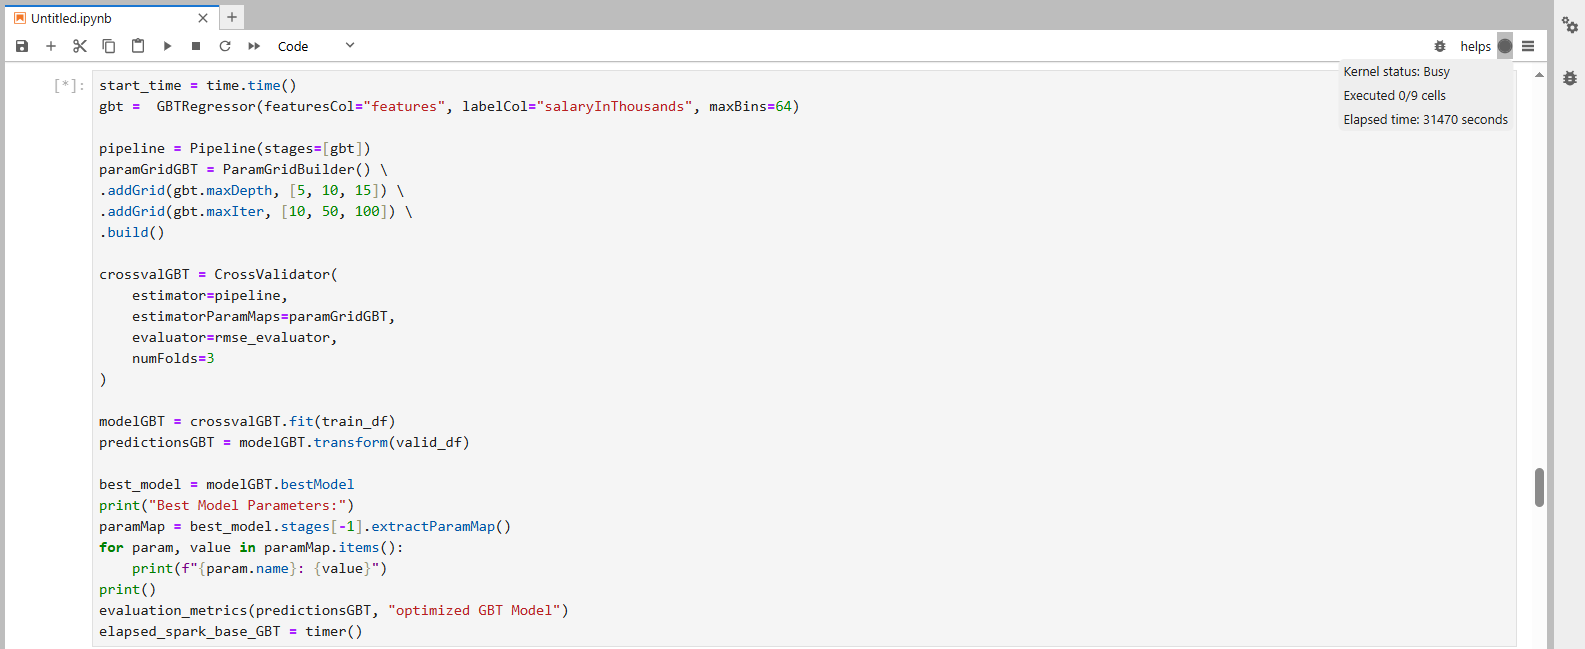

* This optimization task executed for 31470 seconds, totalling ~8.7416 hours in runtime
* Not optimal to run such a lengthy task especially for predicting salaries
    * Lengthy runtime could be attributed to the large number of trees
    * The search space might have been too large, leading to a long runtime
* Enhancements could be to implement a narrow search space, and early stopping

In [19]:
feature_importances = gbt_model.featureImportances
print("base GBT model")
print()
print("Feature Importances:", feature_importances)

base GBT model

Feature Importances: (89,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88],[0.16781475961530765,0.1387905936486315,0.000871427682510241,0.0009528067310747302,0.0009367200192864916,0.0009127762339045928,0.0009712452810642917,0.001008032972118027,0.0008135616260286165,0.0008575834836338829,0.0010813404794964743,0.0009063928774327705,0.000847639674081971,0.0009745234299611437,0.0012955401509721696,0.0011027001978979626,0.0009579086489344482,0.0008710197561364164,0.0009124463046289044,0.0008669858165779137,0.000826370947917984,0.0009927001098577978,0.0010924820211791776,0.0009803082553162708,0.0010281126508683656,0.0010587890052096433,0.0011656241642672672,0.0009412843057442226,0.0010690352425097086,0.0010072800844052128,0.0009885172103896319,0.0010657772038622534,0.00

In [48]:
feature_importances = gbt_model.featureImportances
index_cols = [f"{col}_classVec" for col in categorical_cols]
scaled_feature_col = "scaled_features"
all_feature_cols = [scaled_feature_col] + index_cols
all_feature_names = float_cols + [f"{col}_{i}" for col in categorical_cols for i in range(len(index_cols))]

# Create a dictionary to map feature names to their importances
feature_importance_dict = dict(zip(all_feature_names, feature_importances))

# Display feature importances with feature names
print("Feature Importances:")
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")

Feature Importances:
yearsExperience: 0.1687400303960864
distanceFromCBD: 0.14063260675212855
companyId_0: 0.0010174097353864416
companyId_1: 0.0008725541678140529
companyId_2: 0.0009646652351345745
companyId_3: 0.0010484208638757346
companyId_4: 0.0010663545891337184
jobRole_0: 0.0009182126682400067
jobRole_1: 0.000916011921208677
jobRole_2: 0.0010661918330842402
jobRole_3: 0.0009832513558018117
jobRole_4: 0.001028963383444729
education_0: 0.0010450602147781115
education_1: 0.0009422241901057107
education_2: 0.0011093474434939027
education_3: 0.000952832335608253
education_4: 0.0011202455198542278
major_0: 0.0007372633857587604
major_1: 0.0011128773677295753
major_2: 0.0009244601118318706
major_3: 0.001049745043499415
major_4: 0.0008061703530142986
industry_0: 0.0011540582566101842
industry_1: 0.0009907936304752658
industry_2: 0.0011571347286509998
industry_3: 0.000827675882652445
industry_4: 0.0011944968098976656


## with non-pyspark

Follows similar steps to the pyspark workflow, with some changes
Encompasses
* Data cleaning, Model training, Prediction
* Findings, reasons and insights

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Initial Cleaning

In [148]:
pd_train_df = pd.read_csv("train_dataset.csv")
pd_train_salaries_df = pd.read_csv("train_salaries.csv")

In [149]:
# Merge the dataframes
employee_data = pd.merge(pd_train_df, pd_train_salaries_df, on='jobId', how='left')

In [65]:
employee_data[employee_data["salaryInThousands"]==0]

,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,salaryInThousands
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [66]:
median_salaries_by_job_role = employee_data.groupby('jobRole')['salaryInThousands'].median().reset_index()
median_salaries_by_job_role.columns = ['jobRole', 'medianSalary']

employee_data = pd.merge(employee_data, median_salaries_by_job_role, on='jobRole', how='left')

employee_data['salaryInThousands'] = employee_data.apply(
    lambda row: row['medianSalary'] if row['salaryInThousands'] == 0 else row['salaryInThousands'],
    axis=1
)
employee_data = employee_data.drop(columns=['medianSalary'])
employee_data.head()

,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,salaryInThousands
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101.0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137.0
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142.0
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163.0


In [67]:
employee_data[employee_data["salaryInThousands"]==0]

,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,salaryInThousands


Use the relevant columns and features - all columns except jobId

In [68]:
employee_data.drop(columns=['jobId'], inplace=True)
pandas_df = employee_data

In [69]:
df2 = pandas_df[['companyId','jobRole', 'education', 'major', 'industry',
          'yearsExperience', 'distanceFromCBD', 'salaryInThousands']]

### Preprocessing

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [71]:
categorical_cols = ["companyId","jobRole", "education", "major", "industry"]

float_cols = ["yearsExperience","distanceFromCBD"]

# Filter existing columns
categorical_cols = [col for col in categorical_cols if col in pandas_df.columns]
float_cols = [col for col in float_cols if col in pandas_df.columns]

In [72]:
start_time = time.time()

# Create a copy
df2 = df2.copy()
for col in categorical_cols:
    df2[col] = df2[col].astype('category')
    
# One-Hot Encoding for Categorical columns
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical = encoder.fit_transform(df2[categorical_cols])

# Create DataFrame with encoded features
encoded_categorical_df = pd.DataFrame(encoded_categorical,
                                      columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate with original
df2 = pd.concat([df2, encoded_categorical_df], axis=1)
df2.drop(columns=categorical_cols, inplace=True)

# Use MinMax Scaler for Float columns
df2 = df2.astype('float64')
scaler = MinMaxScaler()
df2[float_cols] = scaler.fit_transform(df2[float_cols])

# Split into X and y
X = df2.drop(columns=['salaryInThousands'])
y = df2['salaryInThousands']
elapsed_nonspark_preprocessing_time = timer()


Elapsed 3.95 seconds


In [86]:
feature_cols=[x for x in df2.columns if x!='salaryInThousands']
print(feature_cols)
print("\nnumber of features= {}".format(len(feature_cols)))

['yearsExperience', 'distanceFromCBD', 'companyId_COMP0', 'companyId_COMP1', 'companyId_COMP10', 'companyId_COMP11', 'companyId_COMP12', 'companyId_COMP13', 'companyId_COMP14', 'companyId_COMP15', 'companyId_COMP16', 'companyId_COMP17', 'companyId_COMP18', 'companyId_COMP19', 'companyId_COMP2', 'companyId_COMP20', 'companyId_COMP21', 'companyId_COMP22', 'companyId_COMP23', 'companyId_COMP24', 'companyId_COMP25', 'companyId_COMP26', 'companyId_COMP27', 'companyId_COMP28', 'companyId_COMP29', 'companyId_COMP3', 'companyId_COMP30', 'companyId_COMP31', 'companyId_COMP32', 'companyId_COMP33', 'companyId_COMP34', 'companyId_COMP35', 'companyId_COMP36', 'companyId_COMP37', 'companyId_COMP38', 'companyId_COMP39', 'companyId_COMP4', 'companyId_COMP40', 'companyId_COMP41', 'companyId_COMP42', 'companyId_COMP43', 'companyId_COMP44', 'companyId_COMP45', 'companyId_COMP46', 'companyId_COMP47', 'companyId_COMP48', 'companyId_COMP49', 'companyId_COMP5', 'companyId_COMP50', 'companyId_COMP51', 'compan

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model training

In [74]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
def evaluation_metrics_pandas(y_test, y_pred, model):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Metrics for {model}")
    print("Root Mean Squared Error (RMSE):", np.sqrt(mse))
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared:", r2)

#### Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression
start_time = time.time()
LRbase = LinearRegression()
LRbase.fit(X_train, y_train)
y_pred = LRbase.predict(X_test)
evaluation_metrics_pandas(y_test, y_pred, "base Linear Regression Model")
elapsed_nonspark_base_lr = timer()

Metrics for base Linear Regression Model
Root Mean Squared Error (RMSE): 19.595839171863517
Mean Absolute Error (MAE): 15.836440358072917
R-squared: 0.7446070074898301

Elapsed 7.11 seconds


Intercept: 116.23175540165253


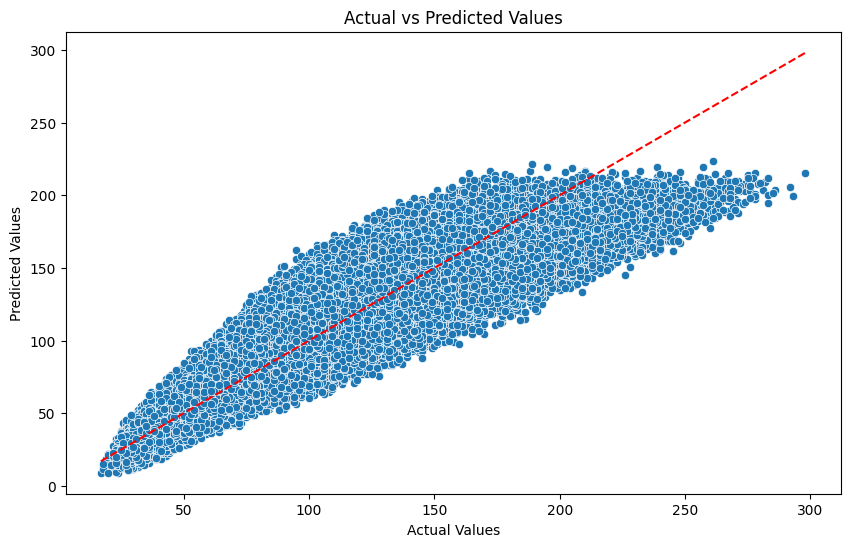

In [79]:
y_pred = LRbase.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results, x='Actual', y='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
print("Intercept:", LRbase.intercept_)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [270]:
y_pred = LRbase.predict(X_test)
results = pd.DataFrame({
    'Actual': y_test, 
    'Predicted': y_pred,
    'Difference %': 100 - (y_test/y_pred)*100
})
print(results.head(10))

        Actual   Predicted  Difference %
987231   174.0  142.337891    -22.244329
79954     58.0   73.152344     20.713408
567130   168.0  176.728516      4.938940
500891    85.0  110.085938     22.787595
55399    145.0  127.820312    -13.440499
135049   135.0  125.490234     -7.578092
733378   153.0  123.984375    -23.402647
732057    82.0   78.015625     -5.107150
51333    120.0  121.453125      1.196449
731479   147.0  134.042969     -9.666327


Optimization with GridSearchCV

In [77]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
start_time = time.time()
ridge = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (MSE):", np.sqrt(best_score))

LRbest_model = grid_search.best_estimator_
y_pred = LRbest_model.predict(X_test)
evaluation_metrics_pandas(y_test, y_pred, "optim Linear Regression Model")
print("Coefficients:", LRbest_model.coef_)
print("Intercept:", LRbest_model.intercept_)
elapsed_nonspark_optim_lr = timer()

Best Parameters: {'alpha': 10}
Best Score (MSE): 19.61243343547748
Metrics for optim Linear Regression Model
Root Mean Squared Error (RMSE): 19.59595475755202
Mean Absolute Error (MAE): 15.836271948761738
R-squared: 0.7446039946194265
Coefficients: [ 4.81817811e+01 -3.95801474e+01 -2.73985199e-02 -3.32086358e-01
  9.45470690e-02  8.46307717e-02 -1.83805013e-01  2.21385536e-01
  2.80921221e-02  6.98176433e-02 -2.92567756e-02 -7.76021045e-02
 -3.54278562e-01  3.52759359e-02  3.70430614e-01 -1.21289793e-01
  1.39934451e-01  2.04510712e-01  6.77628369e-02  2.31074120e-01
  1.34326298e-01 -4.45549114e-03  8.04197751e-02  2.22681299e-01
  1.88589747e-01 -5.73130457e-03 -2.44240286e-01 -6.79335408e-02
 -6.35986930e-02  9.71563551e-02  2.76512341e-02  1.61461294e-01
  2.39088543e-02 -2.72830831e-01  3.44479223e-02 -1.86811139e-01
  1.16271790e-01  2.73328164e-01  6.55385728e-02  1.52097984e-01
 -8.91731395e-02  4.56768313e-01  4.12542495e-02  1.58235659e-02
 -2.10633392e-01 -2.77714228e-01  8.

Intercept: 116.23175540165253


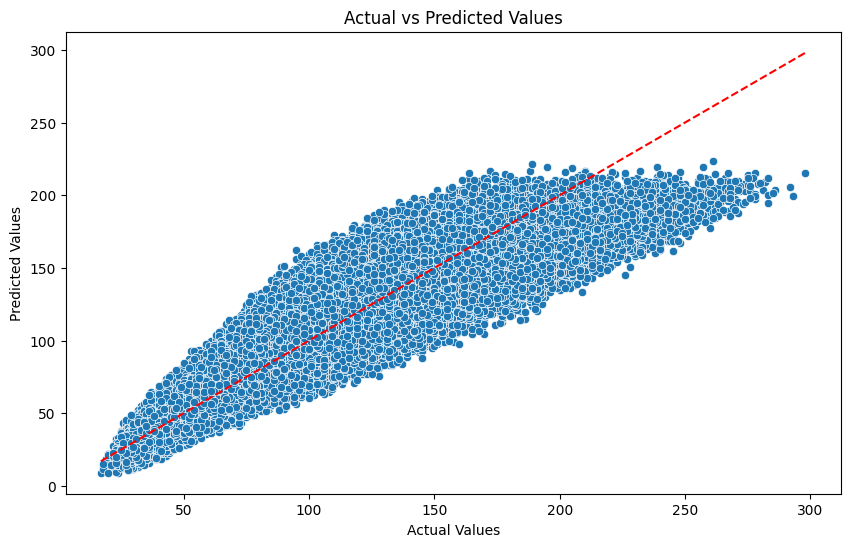

In [80]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results, x='Actual', y='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
print("Intercept:", LRbest_model.intercept_)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [269]:
y_pred = LRbest_model.predict(X_test)
results = pd.DataFrame({
    'Actual': y_test, 
    'Predicted': y_pred,
    'Difference %': 100 - (y_test/y_pred)*100
})
print(results.head(10))

        Actual   Predicted  Difference %
987231   174.0  142.321432    -22.258467
79954     58.0   73.140598     20.700676
567130   168.0  176.683065      4.914486
500891    85.0  110.083284     22.785734
55399    145.0  127.750249    -13.502714
135049   135.0  125.431931     -7.628097
733378   153.0  123.950246    -23.436624
732057    82.0   78.048710     -5.062595
51333    120.0  121.490677      1.226989
731479   147.0  134.049998     -9.660576


#### RandomForest Regressor

Set the params to the best_model derived from pyspark RF portion

In [93]:
from sklearn.ensemble import RandomForestRegressor
start_time = time.time()
rf_regressor_1 = RandomForestRegressor(
    n_estimators=100,               
    max_depth=5,                     
    min_samples_split=2,          
    min_samples_leaf=1,              
    bootstrap=True,     
    random_state=42
)
rf_regressor_1.fit(X_train, y_train)
predictions = rf_regressor_1.predict(X_test)
rf_regressor_1.fit(X_train, y_train)
y_pred = rf_regressor_1.predict(X_test)
evaluation_metrics_pandas(y_test, y_pred, "base Random Forest Regressor Model")
elapsed_nonspark_base_rf_1 = timer()

Metrics for base Random Forest Regressor Model
Root Mean Squared Error (RMSE): 26.72110846039494
Mean Absolute Error (MAE): 21.039534868515492
R-squared: 0.5251131063653414

Elapsed 362.64 seconds


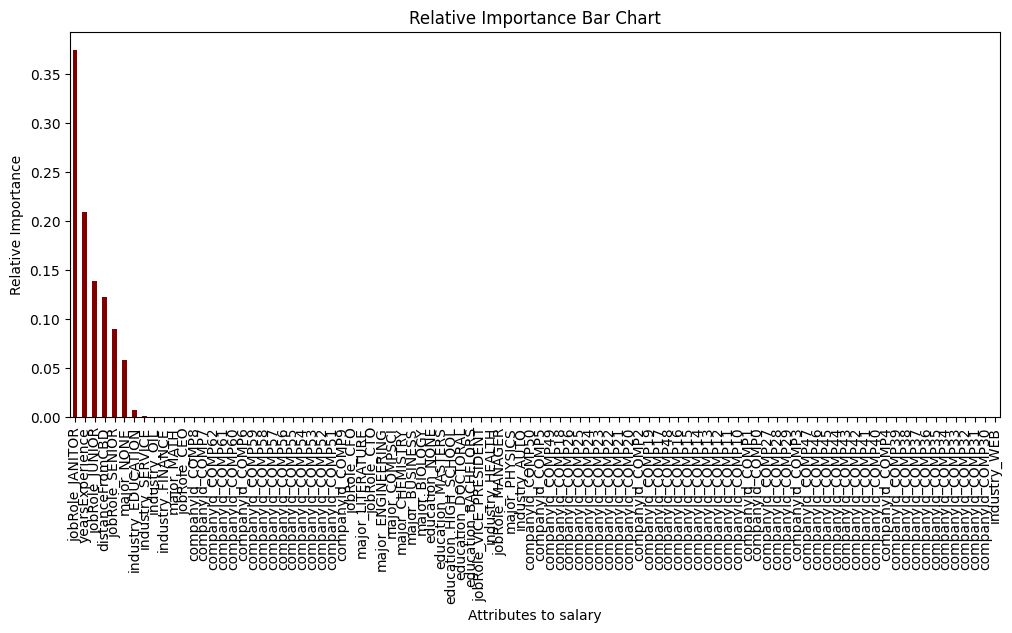

In [94]:
feature_imp = pd.Series(rf_regressor_1.feature_importances_, index=feature_cols).sort_values(ascending=False)
fig = plt.figure(figsize=(12,5))
ax = feature_imp.plot(kind='bar',color='maroon')
ax.set(title='Relative Importance Bar Chart')
ax.set(xlabel='Attributes to salary')
ax.set(ylabel='Relative Importance')
plt.show()

In [268]:
y_pred = rf_regressor_1.predict(X_test)
results = pd.DataFrame({
    'Actual': y_test, 
    'Predicted': y_pred,
    'Difference %': 100 - (y_test/y_pred)*100
})
print(results.head(10))

        Actual   Predicted  Difference %
987231   174.0  147.426562    -18.024865
79954     58.0   78.436984     26.055291
567130   168.0  156.690528     -7.217713
500891    85.0  108.338692     21.542343
55399    145.0  103.546315    -40.033955
135049   135.0  127.327195     -6.026053
733378   153.0  108.338692    -41.223783
732057    82.0  108.338692     24.311436
51333    120.0  127.327195      5.754619
731479   147.0  130.559260    -12.592550


In [95]:
start_time = time.time()
rf_regressor_2 = RandomForestRegressor(random_state=42)
rf_regressor_2.fit(X_train, y_train)
y_pred = rf_regressor_2.predict(X_test)
evaluation_metrics_pandas(y_test, y_pred, "base Random Forest Regressor Model")
elapsed_nonspark_base_rf_2 = timer()

Metrics for base Random Forest Regressor Model
Root Mean Squared Error (RMSE): 20.043469840917084
Mean Absolute Error (MAE): 16.087375335115436
R-squared: 0.7328057807797741

Elapsed 1082.45 seconds


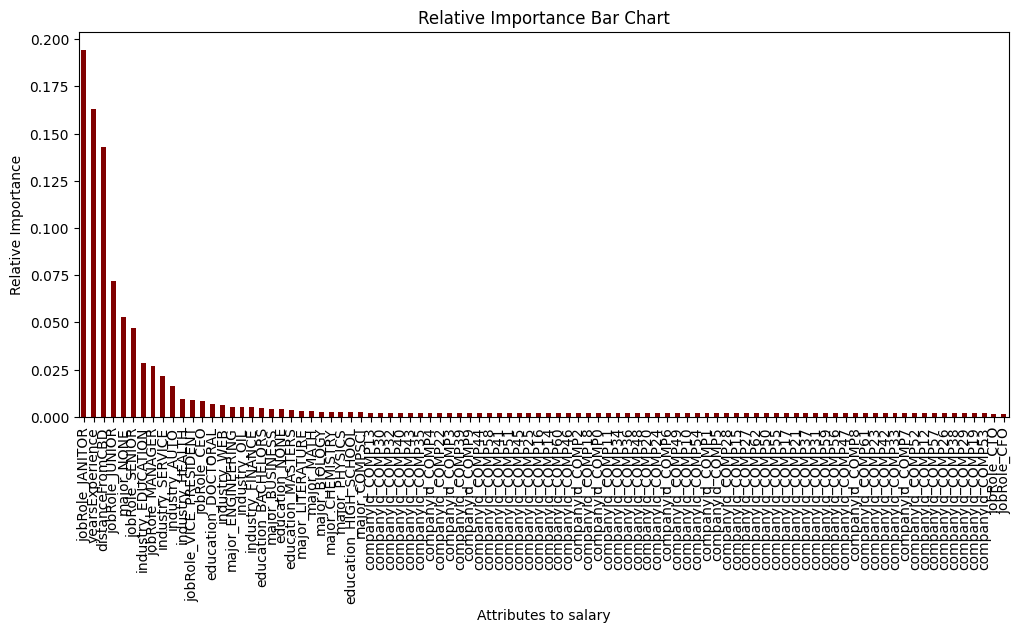

In [172]:
feature_imp = pd.Series(rf_regressor_2.feature_importances_, index=feature_cols).sort_values(ascending=False)
fig = plt.figure(figsize=(12,5))
ax = feature_imp.plot(kind='bar',color='maroon')
ax.set(title='Relative Importance Bar Chart')
ax.set(xlabel='Attributes to salary')
ax.set(ylabel='Relative Importance')
plt.show()

In [267]:
y_pred = rf_regressor_2.predict(X_test)
results = pd.DataFrame({
    'Actual': y_test, 
    'Predicted': y_pred,
    'Difference %': 100 - (y_test/y_pred)*100
})
print(results.head(10))

        Actual  Predicted  Difference %
987231   174.0     128.94    -34.946487
79954     58.0      63.94      9.289959
567130   168.0     171.66      2.132122
500891    85.0     119.68     28.977273
55399    145.0     126.42    -14.697042
135049   135.0     127.25     -6.090373
733378   153.0     122.75    -24.643585
732057    82.0      81.33     -0.823804
51333    120.0     117.76     -1.902174
731479   147.0     137.72     -6.738310


#### LGBM Regressor

In [84]:
import lightgbm as lgb
lgbm = lgb.LGBMRegressor(objective='regression', metric='rmse')
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
evaluation_metrics_pandas(y_test, y_pred, "base LGBM Model")
importances = lgbm.feature_importances_
print()
print("Feature Importances:", importances)
elapsed_nonspark_base_lgbm = timer()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 309
[LightGBM] [Info] Number of data points in the train set: 700000, number of used features: 94
[LightGBM] [Info] Start training from score 116.043843
Metrics for base LGBM Model
Root Mean Squared Error (RMSE): 18.906425456374343
Mean Absolute Error (MAE): 15.352717897247716
R-squared: 0.7622611829186613

Feature Importances: [424 418   1   2   1   1   1   0   0   0   0   0   2   1   3   0   3   0
   1   5   2   1   2   1   0   3   2   1   1   0   0   0   4   0   0   1
   4   0   0   0   0   1   0   1   0   2   1   1   1   3   0   3   0   0
   0   3   1   0   0   1   2   1   1   2   1 101  65  65  60 115  66  90
  34  28  60  23  38  51  41 104  33  18 107  72  28 116  41  70 158 119
  88 124 102  73]

Elapsed 757.64 seconds


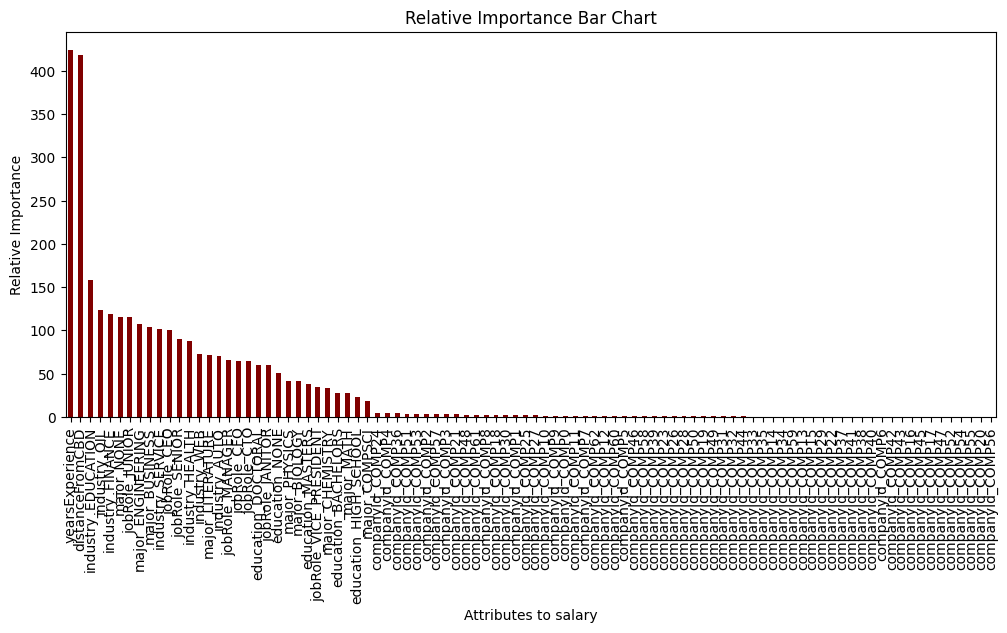

In [99]:
feature_imp = pd.Series(lgbm.feature_importances_, index=feature_cols).sort_values(ascending=False)
fig = plt.figure(figsize=(12,5))
ax = feature_imp.plot(kind='bar',color='maroon')
ax.set(title='Relative Importance Bar Chart')
ax.set(xlabel='Attributes to salary')
ax.set(ylabel='Relative Importance')
plt.show()

In [265]:
y_pred = lgbm.predict(X_test)
results = pd.DataFrame({
    'Actual': y_test, 
    'Predicted': y_pred,
    'Difference %': 100 - (y_test/y_pred)*100
})
print(results.head(10))

        Actual   Predicted  Difference %
987231   174.0  140.696832    -23.670162
79954     58.0   70.036006     17.185455
567130   168.0  185.055984      9.216662
500891    85.0  114.412302     25.707290
55399    145.0  123.533873    -17.376714
135049   135.0  123.790169     -9.055510
733378   153.0  122.281663    -25.120968
732057    82.0   87.176508      5.937963
51333    120.0  114.557964     -4.750465
731479   147.0  129.086215    -13.877380


#### GBT Regressor

In [85]:
from sklearn.ensemble import GradientBoostingRegressor
start_time = time.time()
gbt = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)
gbt.fit(X_train, y_train)
y_pred = gbt.predict(X_test)
evaluation_metrics_pandas(y_test, y_pred, "base GBT Model")
importances = gbt.feature_importances_
print()
print("Feature Importances:", importances)
elapsed_nonspark_base_gbt = timer()

Metrics for base GBT Model
Root Mean Squared Error (RMSE): 19.381593485045073
Mean Absolute Error (MAE): 15.658841281920312
R-squared: 0.7501610162624056

Feature Importances: [1.89874139e-01 1.30036764e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 

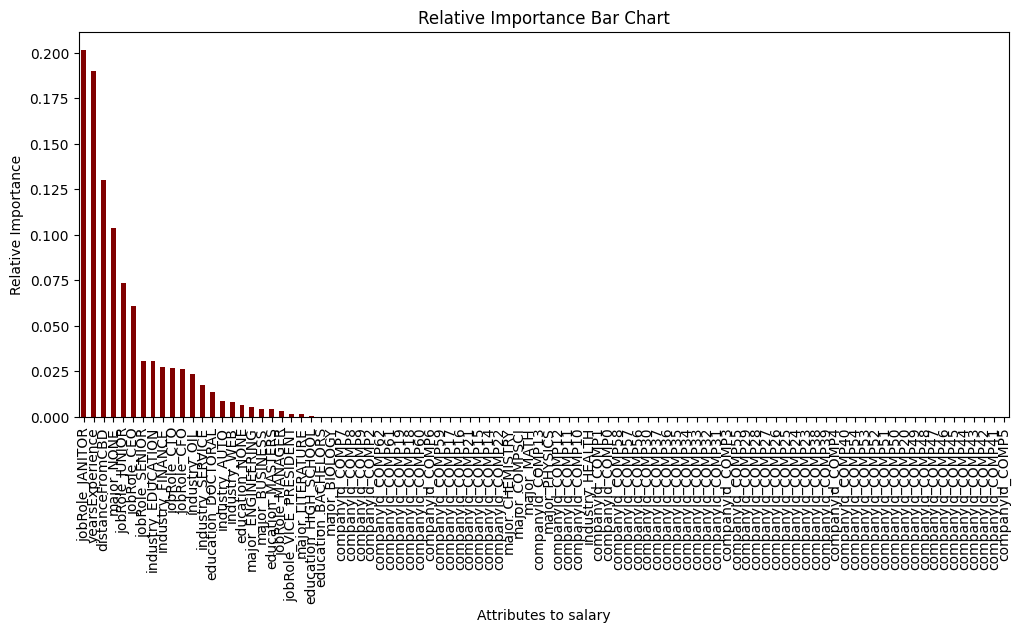

In [100]:
feature_imp = pd.Series(gbt.feature_importances_, index=feature_cols).sort_values(ascending=False)
fig = plt.figure(figsize=(12,5))
ax = feature_imp.plot(kind='bar',color='maroon')
ax.set(title='Relative Importance Bar Chart')
ax.set(xlabel='Attributes to salary')
ax.set(ylabel='Relative Importance')
plt.show()

In [266]:
y_pred = gbt.predict(X_test)
results = pd.DataFrame({
    'Actual': y_test, 
    'Predicted': y_pred,
    'Difference %': 100 - (y_test/y_pred)*100
})
print(results.head(10))

        Actual   Predicted  Difference %
987231   174.0  137.783204    -26.285349
79954     58.0   70.703678     17.967493
567130   168.0  177.377045      5.286504
500891    85.0  115.900260     26.661079
55399    145.0  125.103444    -15.904083
135049   135.0  129.840354     -3.973838
733378   153.0  115.433572    -32.543763
732057    82.0   91.333004     10.218654
51333    120.0  116.940877     -2.615957
731479   147.0  128.290272    -14.583902


### Prediction

Prediction to test the generalization of model on completely new unseen data

In [276]:
# 5 completely random, and new people to test model prediction
data = {'companyId': ["COMP27","COMP1","COMP5","COMP30","COMP41"],
        'jobRole': ["JANITOR","SENIOR","CEO","JUNIOR","CTO"],
        'education': ["HIGH_SCHOOL","NONE","MASTERS","NONE","BACHELORS"],
        'major': ["NONE","NONE","LITERATURE","NONE","COMPSCI"],
        'industry': ["SERVICE","OIL","WEB","EDUCATION","FINANCE"],
        'yearsExperience': [21,19,1,4,23],
        'distanceFromCBD': [0,37,90,15,1],
        'medianSalary': [
            employee_data[(employee_data["industry"] == "SERVICE") & (employee_data["jobRole"] == "JANITOR") & (employee_data["yearsExperience"] == 21) & (employee_data["distanceFromCBD"] == 0)]['salaryInThousands'].median(),
            employee_data[(employee_data["industry"] == "OIL") & (employee_data["jobRole"] == "SENIOR") & (employee_data["yearsExperience"] == 19) & (employee_data["distanceFromCBD"] == 37)]['salaryInThousands'].median(),
            employee_data[(employee_data["industry"] == "WEB") & (employee_data["jobRole"] == "CEO") & (employee_data["yearsExperience"] == 1) & (employee_data["distanceFromCBD"] == 90)]['salaryInThousands'].median(),
            employee_data[(employee_data["industry"] == "EDUCATION") & (employee_data["jobRole"] == "JUNIOR") & (employee_data["yearsExperience"] == 4) & (employee_data["distanceFromCBD"] == 15)]['salaryInThousands'].median(),
            employee_data[(employee_data["industry"] == "FINANCE") & (employee_data["jobRole"] == "CTO") & (employee_data["yearsExperience"] == 23) & (employee_data["distanceFromCBD"] == 1)]['salaryInThousands'].median()
        ]}
test_employee_data = pd.DataFrame(data)
test_employee_data

,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,medianSalary
0,COMP27,JANITOR,HIGH_SCHOOL,NONE,SERVICE,21,0,102.5
1,COMP1,SENIOR,NONE,NONE,OIL,19,37,160.0
2,COMP5,CEO,MASTERS,LITERATURE,WEB,1,90,149.0
3,COMP30,JUNIOR,NONE,NONE,EDUCATION,4,15,77.0
4,COMP41,CTO,BACHELORS,COMPSCI,FINANCE,23,1,227.0


In [277]:
float_cols = ["yearsExperience","distanceFromCBD"]
original_feature_names = gbt.feature_names_in_
X = pd.get_dummies(test_employee_data.drop(columns=['medianSalary']))
for col in original_feature_names:
    if col not in X.columns:
        X[col] = 0
scaler = MinMaxScaler()
X[float_cols] = scaler.fit_transform(X[float_cols])
X = X[original_feature_names]

In [278]:
y_pred = LRbest_model.predict(X)
print("Linear Regression Model")
test_employee_data['predictedSalary'] = y_pred
test_employee_data['difference (%)'] = 100 - (test_employee_data['medianSalary'] / y_pred)*100
test_employee_data

Linear Regression Model


,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,medianSalary,predictedSalary,difference (%)
0,COMP27,JANITOR,HIGH_SCHOOL,NONE,SERVICE,21,0,102.5,100.787612,-1.699007
1,COMP1,SENIOR,NONE,NONE,OIL,19,37,160.0,124.937179,-28.064361
2,COMP5,CEO,MASTERS,LITERATURE,WEB,1,90,149.0,108.623782,-37.170698
3,COMP30,JUNIOR,NONE,NONE,EDUCATION,4,15,77.0,60.528221,-27.213387
4,COMP41,CTO,BACHELORS,COMPSCI,FINANCE,23,1,227.0,197.929155,-14.687500


In [279]:
y_pred = rf_regressor_2.predict(X)
print("RF Regressor Model")
test_employee_data['predictedSalary'] = y_pred
test_employee_data['difference (%)'] = 100 - (test_employee_data['medianSalary'] / y_pred)*100
test_employee_data

RF Regressor Model


,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,medianSalary,predictedSalary,difference (%)
0,COMP27,JANITOR,HIGH_SCHOOL,NONE,SERVICE,21,0,102.5,97.05,-5.615662
1,COMP1,SENIOR,NONE,NONE,OIL,19,37,160.0,117.67,-35.973485
2,COMP5,CEO,MASTERS,LITERATURE,WEB,1,90,149.0,121.81,-22.321648
3,COMP30,JUNIOR,NONE,NONE,EDUCATION,4,15,77.0,58.64,-31.309686
4,COMP41,CTO,BACHELORS,COMPSCI,FINANCE,23,1,227.0,212.72,-6.713050


In [280]:
y_pred = lgbm.predict(X)
print("Light GBM Model")
test_employee_data['predictedSalary'] = y_pred
test_employee_data['difference (%)'] = 100 - (test_employee_data['medianSalary'] / y_pred)*100
test_employee_data

Light GBM Model


,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,medianSalary,predictedSalary,difference (%)
0,COMP27,JANITOR,HIGH_SCHOOL,NONE,SERVICE,21,0,102.5,109.810924,6.657738
1,COMP1,SENIOR,NONE,NONE,OIL,19,37,160.0,127.300078,-25.687276
2,COMP5,CEO,MASTERS,LITERATURE,WEB,1,90,149.0,119.896957,-24.273379
3,COMP30,JUNIOR,NONE,NONE,EDUCATION,4,15,77.0,54.369837,-41.622644
4,COMP41,CTO,BACHELORS,COMPSCI,FINANCE,23,1,227.0,207.397246,-9.451791


In [281]:
y_pred = gbt.predict(X)
print("GBT Model")
test_employee_data['predictedSalary'] = y_pred
test_employee_data['difference (%)'] = 100 - (test_employee_data['medianSalary'] / y_pred)*100
test_employee_data

GBT Model


,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,medianSalary,predictedSalary,difference (%)
0,COMP27,JANITOR,HIGH_SCHOOL,NONE,SERVICE,21,0,102.5,109.860974,6.700263
1,COMP1,SENIOR,NONE,NONE,OIL,19,37,160.0,127.753646,-25.241044
2,COMP5,CEO,MASTERS,LITERATURE,WEB,1,90,149.0,125.874819,-18.371570
3,COMP30,JUNIOR,NONE,NONE,EDUCATION,4,15,77.0,59.890694,-28.567553
4,COMP41,CTO,BACHELORS,COMPSCI,FINANCE,23,1,227.0,194.689930,-16.595656
